# **Violent Crime Rates in California**
*María Colomer, Sara Díez and Gússem Yahia-Cheikh*

### Introduction & Objectives

#### 🤖 Project Context
This project focuses on analyzing violent crime rates across counties in the state of California, using public data from 2000 to 2013 provided by U.S. Open Data sources. The original dataset was refined to highlight only the most relevant information for understanding spatial and socioeconomic patterns in crime.

California, being one of the most populous and economically diverse states, offers a unique opportunity to explore how population size, geographic location, and economic factors may correlate with criminal activity.

### Data Loading & Initial Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("VCC_updated.csv", encoding="ISO-8859-1")


In [4]:
df  # Preview of the database to check that everything is correct

reportyear            geoname  geotypevalue     county_name  \
0           2000      Adelanto city           296  San Bernardino   
1           2000  Agoura Hills city           394     Los Angeles   
2           2000            Alameda          6001         Alameda   
3           2000       Alameda city           562         Alameda   
4           2000        Albany city           674         Alameda   
...          ...                ...           ...             ...   
7122        2013     Tehachapi city         78092            Kern   
7123        2013      Wildomar city         85446       Riverside   
7124        2013        Angels city          2112       Calaveras   
7125        2013     McFarland city         44826            Kern   
7126        2013   Orange Cove city         54008          Fresno   

      county_fips               region_name  region_code  dof_population  \
0            6071       Southern California           14           18130   
1            6037       Southern California           14           20537   
2            6001                  Bay Area            1         1443939   
3            6001                  Bay Area            1           72259   
4            6001                  Bay Area            1           16444   
...           ...                       ...          ...             ...   
7122         6029        San Joaquin Valley           10           13316   
7123         6065       Southern California           14           33416   
7124         6009  Central/Southeast Sierra            3            3806   
7125         6029        San Joaquin Valley           10           13141   
7126         6019        San Joaquin Valley           10            9365   

            AA        FR  M_and_NNM         R       VCT  JDNR       rate  
0     0.005461  0.000221   0.000110  0.000772  0.006564   NaN   6.563707  
1     0.001169  0.000097   0.000000  0.000487  0.001753   NaN   1.752934  
2     0.003780  0.000393   0.000076  0.002333  0.006582   NaN   6.582206  
3     0.002519  0.000125   0.000014  0.001522  0.004179   NaN   4.179410  
4     0.002858  0.000182   0.000000  0.002311  0.005351   NaN   5.351496  
...        ...       ...        ...       ...       ...   ...        ...  
7122  0.002131  0.000367   0.000000  0.000514  0.003013   NaN   3.013155  
7123  0.000807  0.000060   0.000000  0.000329  0.001196   NaN   1.195707  
7124  0.001877  0.000268   0.000000  0.000268  0.002414   NaN   2.413516  
7125  0.003581  0.000163   0.000081  0.001465  0.005290   NaN   5.289714  
7126  0.019385  0.001538   0.000000  0.000821  0.021744   NaN  21.743590  

[7127 rows x 15 columns]

We can see that in the column of JDNR standing for 'Jurisdiction Does Not Report' contains NaN, so to handle that:

In [5]:
df.drop(["JDNR"], axis=1, inplace=True)
df.columns

Index(['reportyear', 'geoname', 'geotypevalue', 'county_name', 'county_fips',
       'region_name', 'region_code', 'dof_population', 'AA', 'FR', 'M_and_NNM',
       'R', 'VCT', 'rate'],
      dtype='object')

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7127 entries, 0 to 7126
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reportyear      7127 non-null   int64  
 1   geoname         7127 non-null   object 
 2   geotypevalue    7127 non-null   int64  
 3   county_name     7127 non-null   object 
 4   county_fips     7127 non-null   int64  
 5   region_name     7127 non-null   object 
 6   region_code     7127 non-null   int64  
 7   dof_population  7127 non-null   int64  
 8   AA              7127 non-null   float64
 9   FR              7127 non-null   float64
 10  M_and_NNM       7127 non-null   float64
 11  R               7127 non-null   float64
 12  VCT             7127 non-null   float64
 13  rate            7127 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 779.6+ KB


reportyear  geotypevalue  county_fips  region_code  dof_population  \
count  7127.000000   7127.000000  7127.000000  7127.000000    7.127000e+03   
mean   2006.514803  38714.311211  6056.138207     8.699453    1.293459e+05   
std       4.027136  26461.629975    29.494075     5.145514    5.376305e+05   
min    2000.000000    296.000000  6001.000000     1.000000    9.100000e+01   
25%    2003.000000  13112.000000  6037.000000     4.000000    1.304950e+04   
50%    2007.000000  39122.000000  6059.000000    10.000000    3.492800e+04   
75%    2010.000000  60620.000000  6079.000000    14.000000    7.962250e+04   
max    2013.000000  87056.000000  6115.000000    14.000000    1.001764e+07   

                AA           FR    M_and_NNM            R          VCT  \
count  7127.000000  7127.000000  7127.000000  7127.000000  7127.000000   
mean      0.003192     0.000279     0.000054     0.001882     0.005407   
std       0.009658     0.000751     0.000495     0.015816     0.025788   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001190     0.000109     0.000000     0.000355     0.001965   
50%       0.002180     0.000205     0.000016     0.000756     0.003437   
75%       0.003567     0.000324     0.000053     0.001437     0.005396   
max       0.319149     0.032258     0.022222     0.489362     0.795699   

              rate  
count  7127.000000  
mean      5.406838  
std      25.788374  
min       0.000000  
25%       1.965312  
50%       3.436840  
75%       5.396215  
max     795.698925

### Merging Geographic Coordinates

To effectively visualize and analyze crime data across California, it's important to associate each record with geographic coordinates (latitude and longitude). This will allow us to create meaningful spatial plots and identify regional crime patterns.

The main dataset contains identifiers like `county_name` and `region_name`, but no explicit coordinate information. In this section, we merge the cleaned crime dataset with a secondary dataset that includes latitude and longitude values for each county.

This merge will enable geospatial visualizations in the next step.

We will be using the library geopy found in this article [here](https://www.kaggle.com/code/rayhanlahdji/geocoding-with-geopy-nominatim), where we learned about [Nominatim](https://nominatim.org/release-docs/latest/) and [RateLimiter](https://geopy.readthedocs.io/en/stable/).

In [7]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

/Users/gussemyahia-cheikh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [15]:
# Get unique city or region names (non-null values) from the 'geoname' column
cities = df["geoname"].dropna().unique()

# Set up the Nominatim geolocator (with user agent to respect usage policy)
geolocator = Nominatim(user_agent="geo_plot_app")

# Apply a rate limiter to avoid being blocked for sending requests too quickly
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Initialize a list to store tuples of (city_name, latitude, longitude)
city_coords = []

# Loop through each city name and retrieve its coordinates from Nominatim
for city in cities:
    loc = geocode(f"{city}, California, USA")  # Add region/country for better accuracy
    if loc:
        city_coords.append((city, loc.latitude, loc.longitude))
    else:
        # If the city is not found, store None for coordinates
        city_coords.append((city, None, None))

# Create a DataFrame from the collected coordinate data
coord_df = pd.DataFrame(city_coords, columns=["geoname", "lat", "lon"])

# Save the coordinates to a CSV for merging and future reuse (avoids repeating API calls)
coord_df.to_csv("city_coords.csv", index=False)

Now we have another dataset with the coordinates named `city_coords`, next step is merge it with the original dataset so later then we can plot it to visually understand where crime rates are higher or lower across the state.

In [8]:
df_coords = pd.read_csv("city_coords.csv") #Loading the coordinates database

In [9]:
df[['geoname']].drop_duplicates().head()
df_coords[['geoname']].drop_duplicates().head() #Here we ensure that both dataframes use the same keys, geoname

geoname
0      Adelanto city
1  Agoura Hills city
2            Alameda
3       Alameda city
4        Albany city

In [10]:
df_merged = pd.merge(df, df_coords, on="geoname", how="left")

In [11]:
print(df_merged[['geoname', 'lat', 'lon']].isnull().sum())

geoname    0
lat        0
lon        0
dtype: int64


In [12]:
# See which geonames didn't get matched
missing_coords = df_merged[df_merged['lat'].isnull()]['geoname'].unique()
print(missing_coords[:1000])  # Just show a sample

[]


In [ ]:
df_merged.to_csv("VCC_with_coords.csv", index=False)

In [15]:
df_geo=pd.read_csv("VCC_with_coords.csv")

### Geographic Visulaization

In [14]:
import geopandas as gpd
import matplotlib.image as mpimg

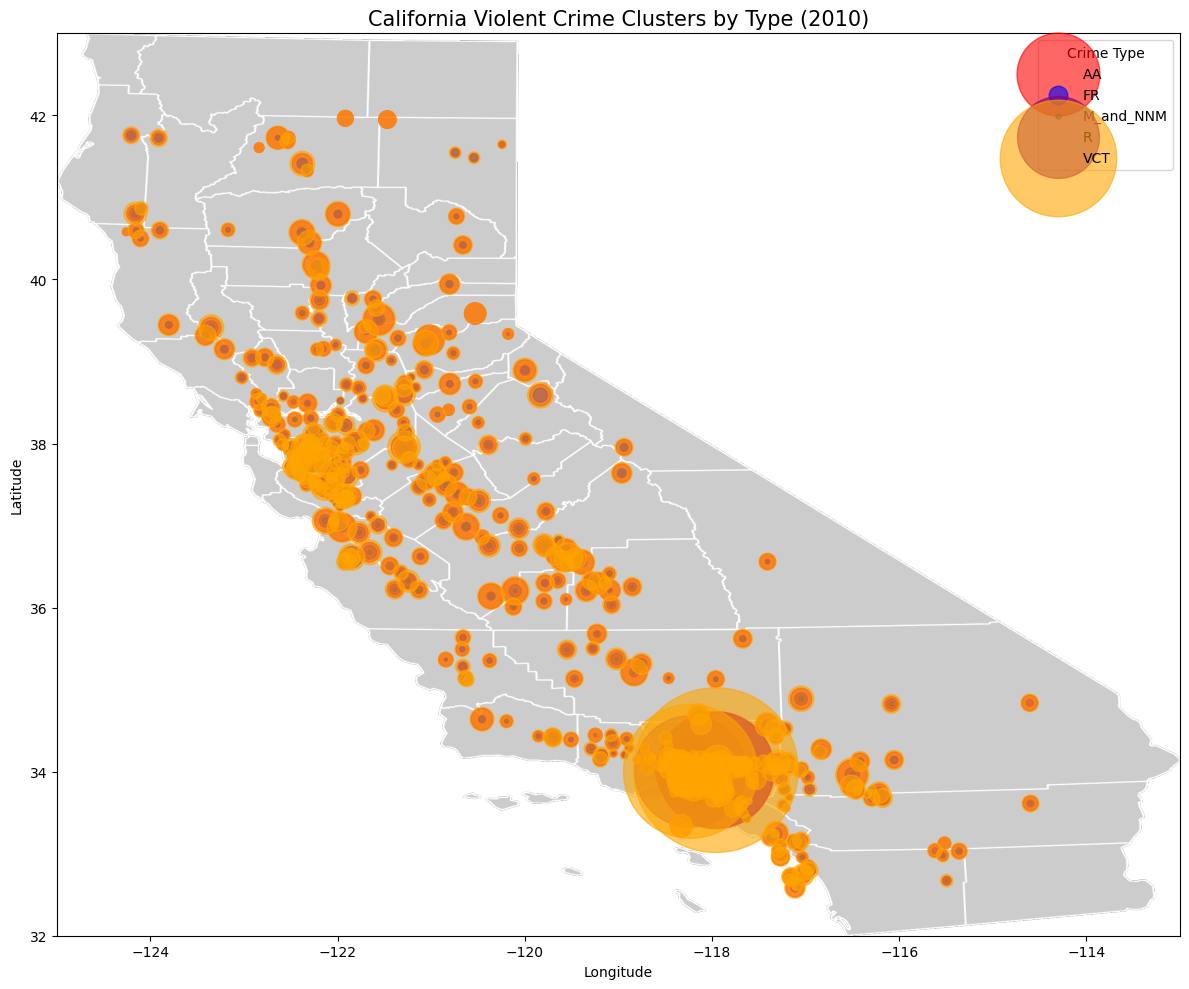

In [16]:
# Define crime categories and their colors
crime_categories = ["AA", "FR", "M_and_NNM", "R", "VCT"]
crime_colors = {"AA": "red", "FR": "blue", "M_and_NNM": "green", "R": "purple", "VCT": "orange"}

# Load the background image
bg_img = mpimg.imread("California_Map.png")  # Ensure this path is correct

def plot_crime_clusters(year):
    filtered = df_geo[df_geo["reportyear"] == year]

    fig, ax = plt.subplots(figsize=(12, 10))

    # Display the background image
    ax.imshow(bg_img, extent=[-125, -113, 32, 43], aspect='auto')

    # Plot each crime type
    for crime in crime_categories:
        subset = filtered[filtered[crime] > 0]
        ax.scatter(
            subset["lon"],
            subset["lat"],
            s=subset[crime] * 40000,  # Adjust the scaling factor as needed
            c=crime_colors[crime],
            alpha=0.6,
            label=crime
        )

    ax.set_xlim(-125, -113)
    ax.set_ylim(32, 43)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"California Violent Crime Clusters by Type ({year})", fontsize=15)
    ax.legend(title="Crime Type")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Example usage
plot_crime_clusters(2010)

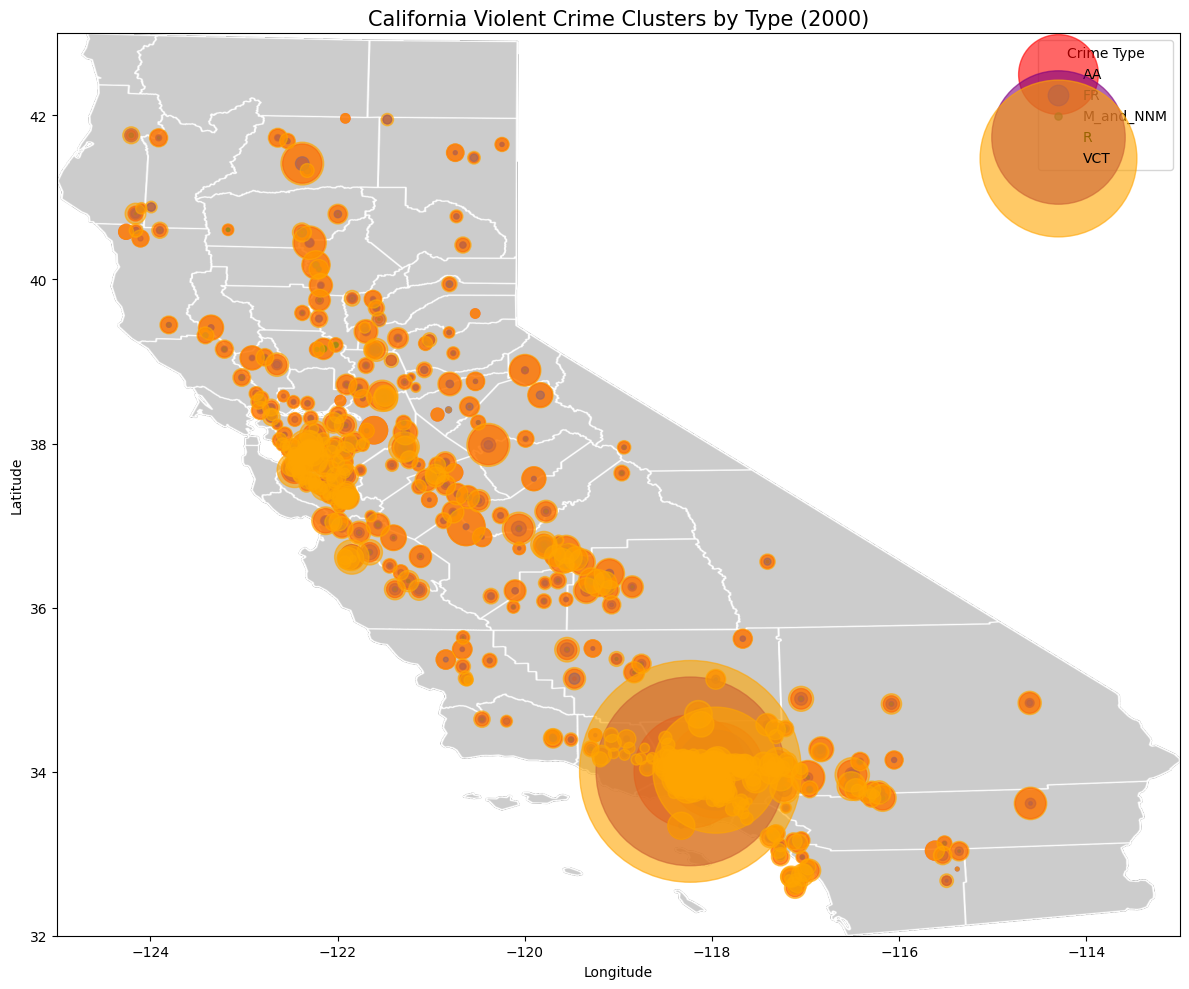

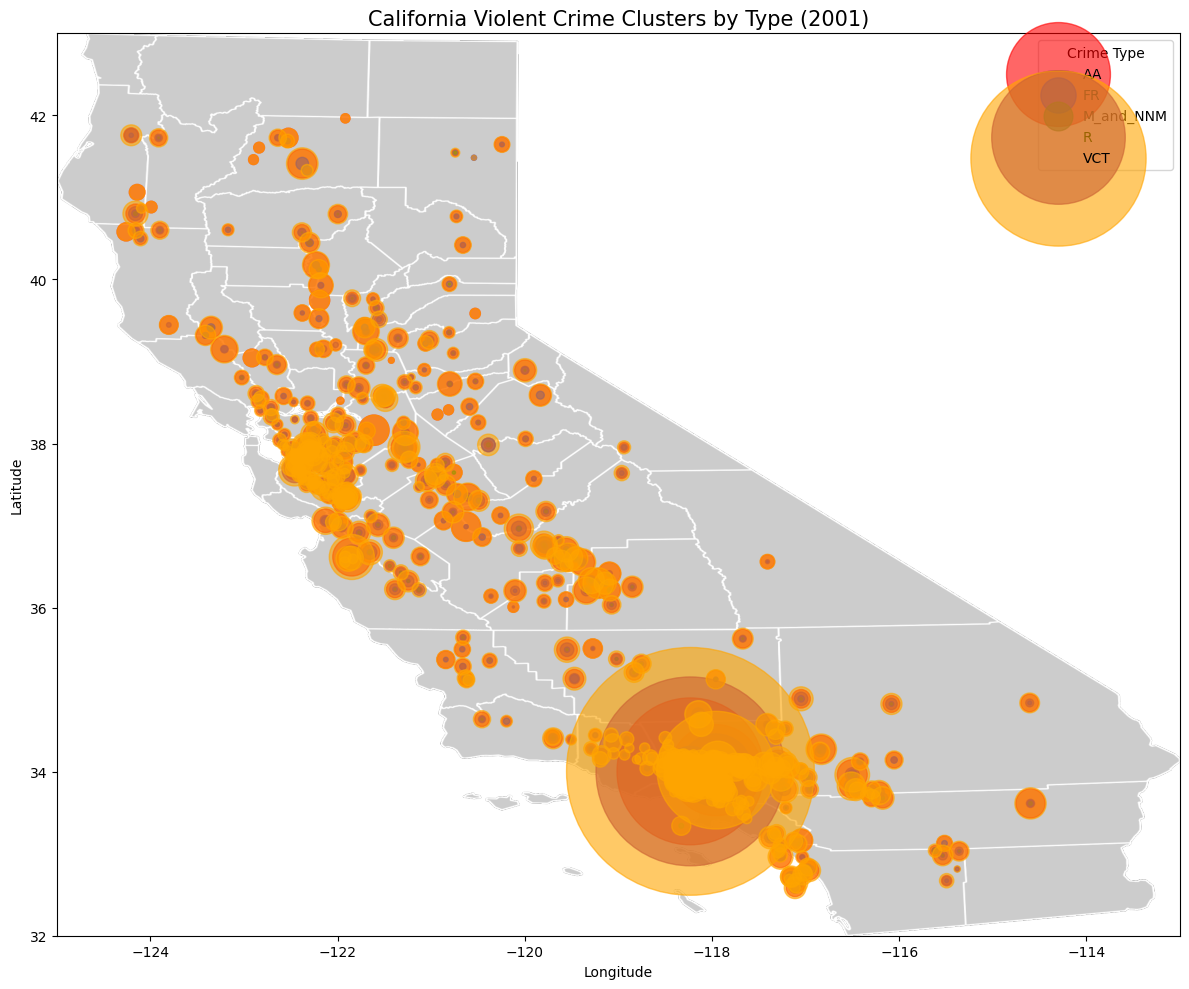

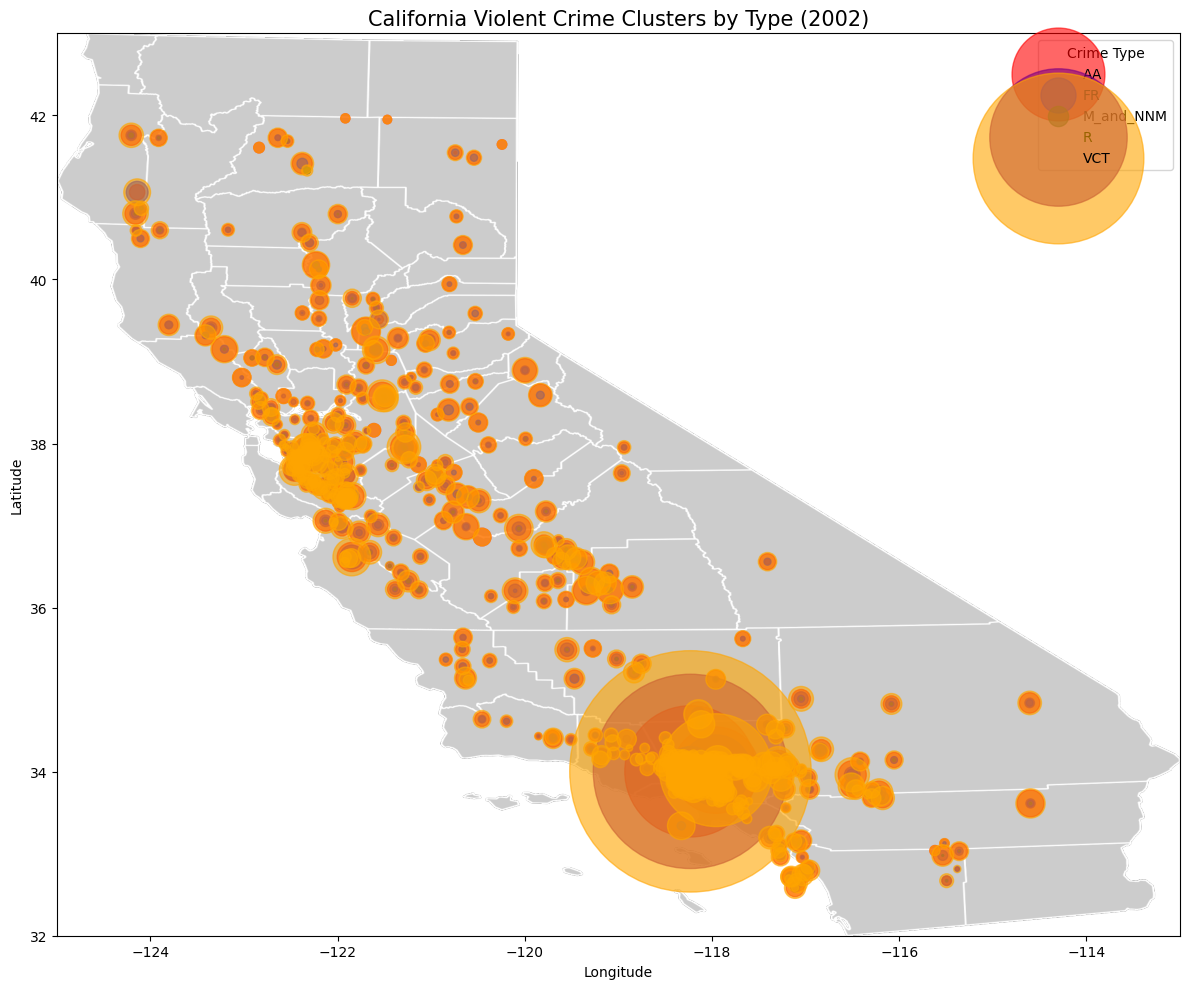

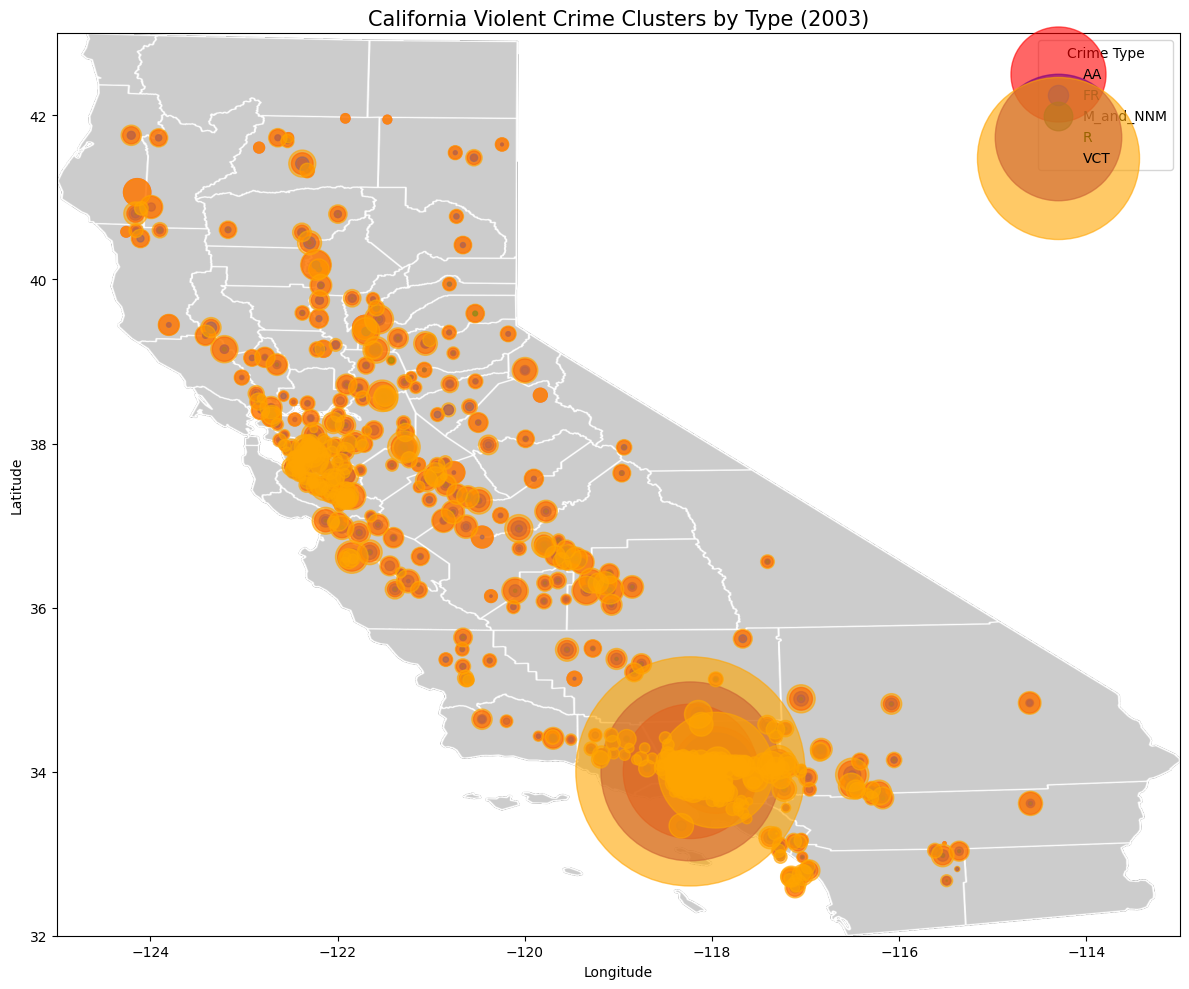

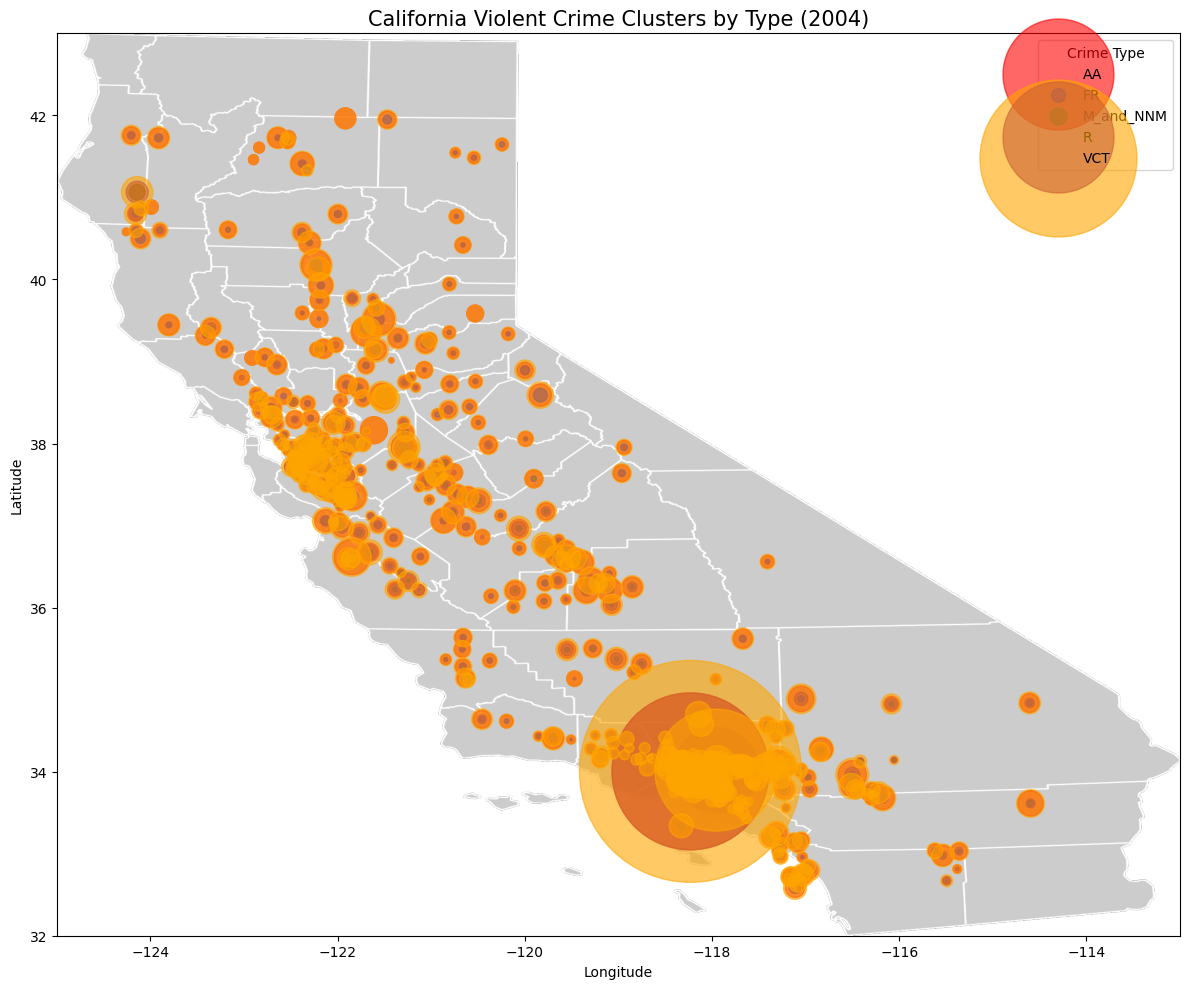

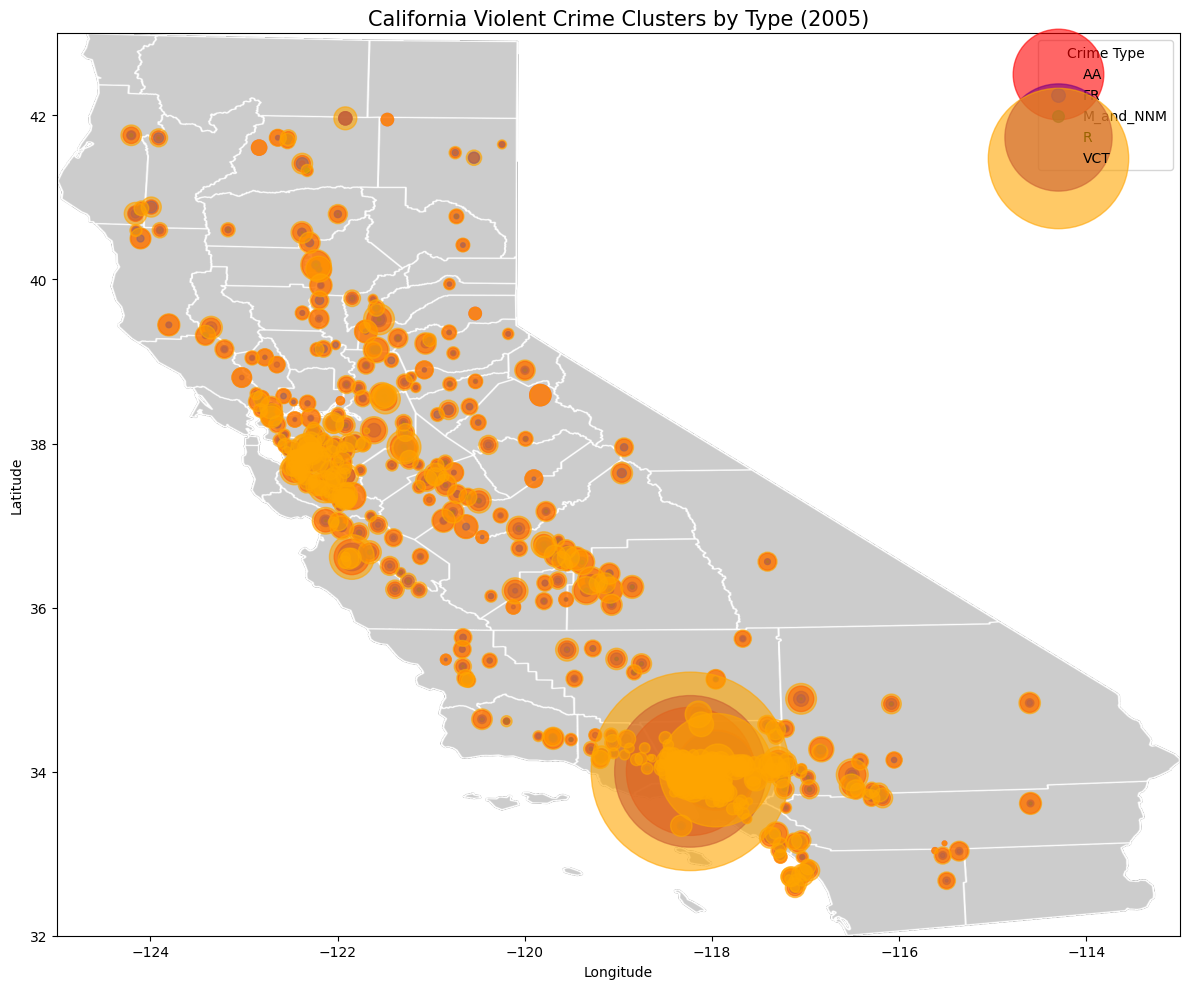

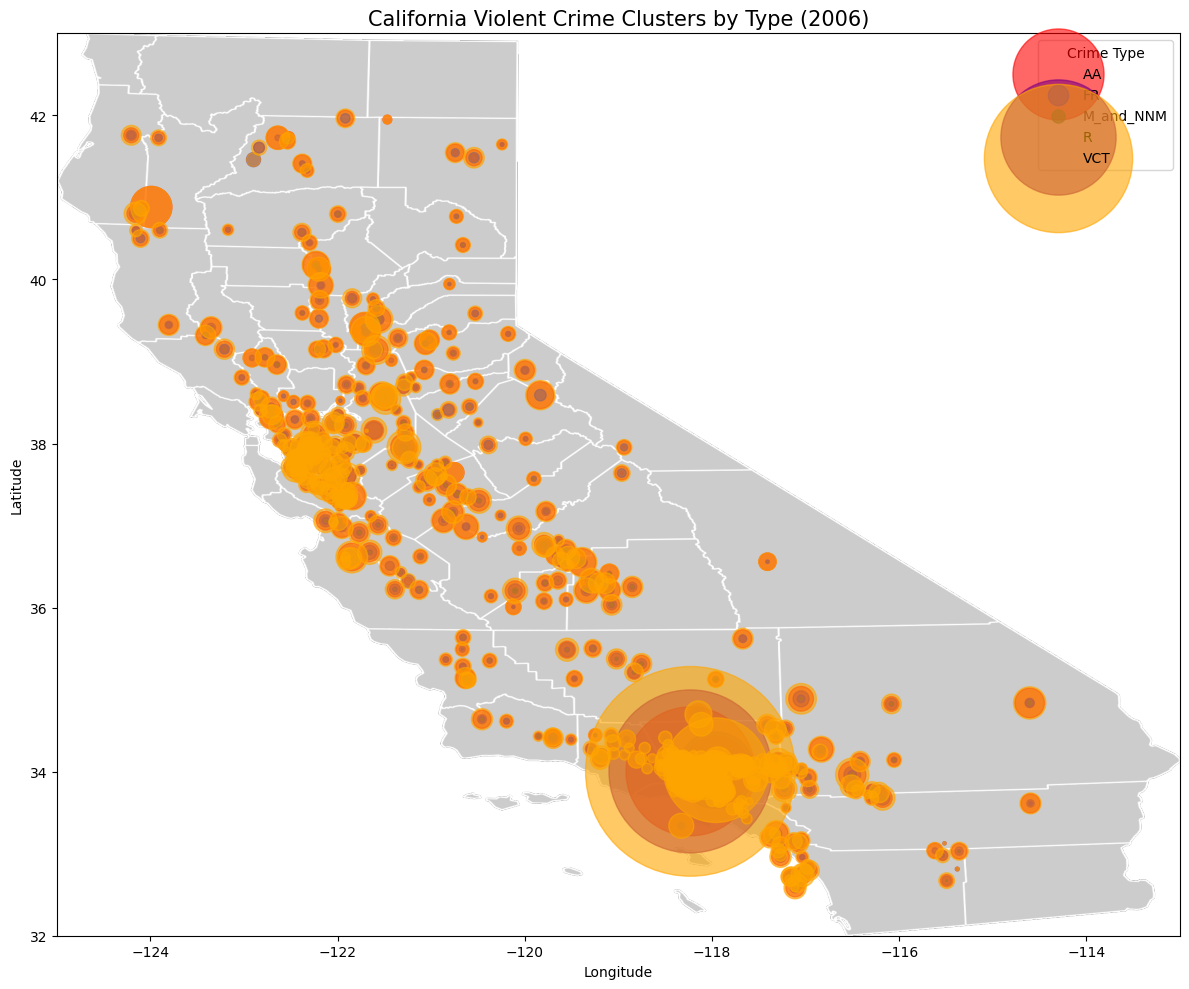

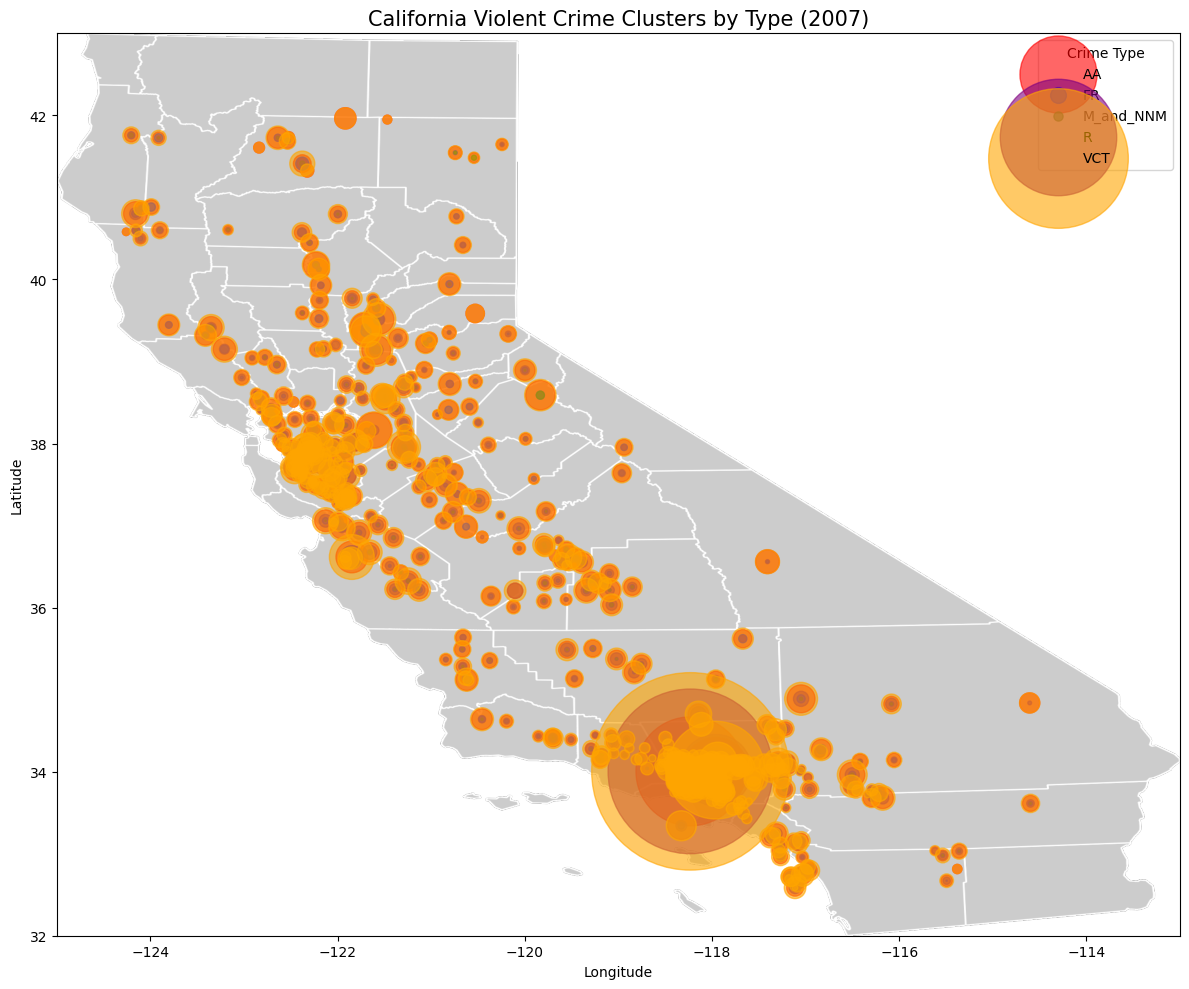

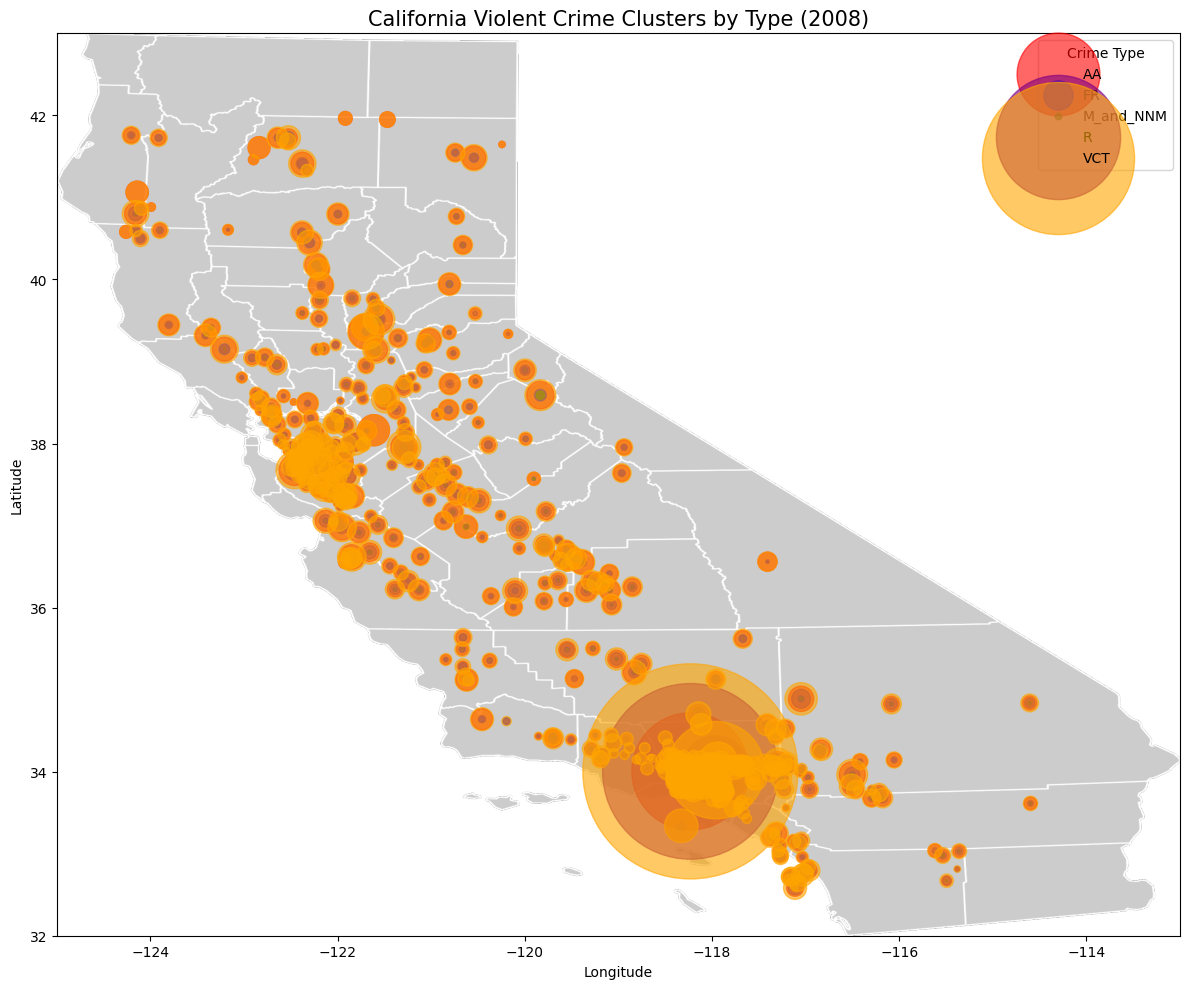

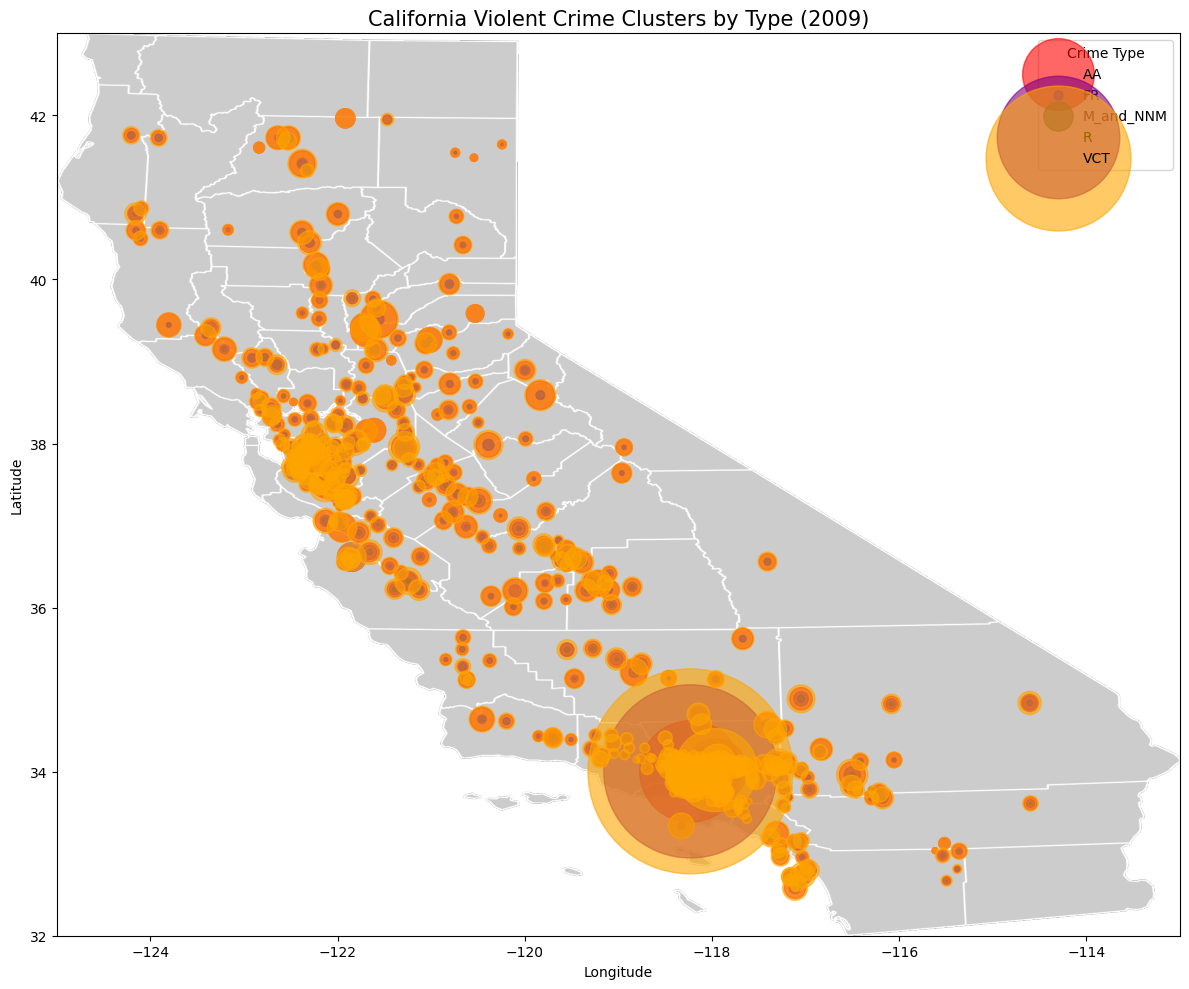

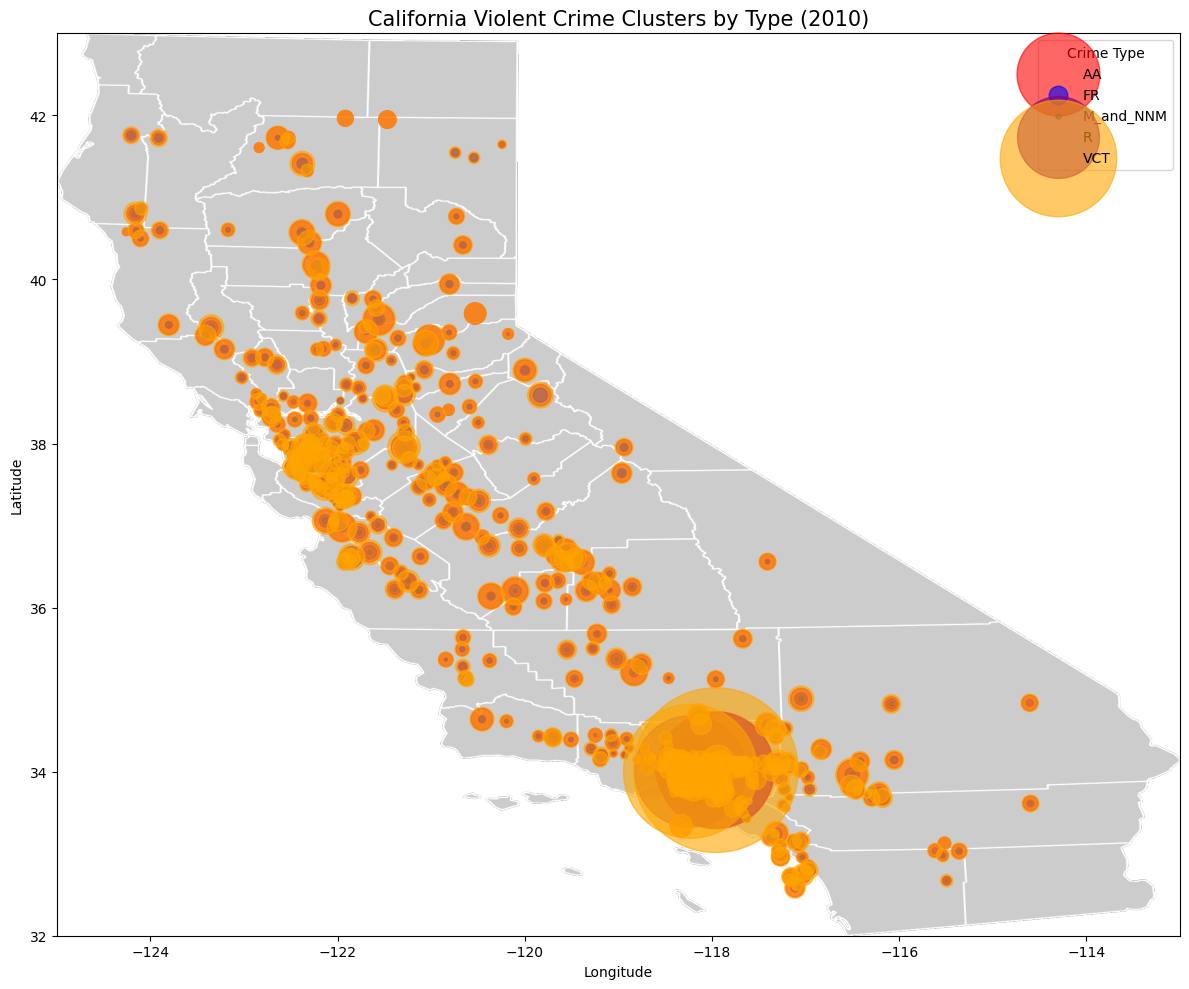

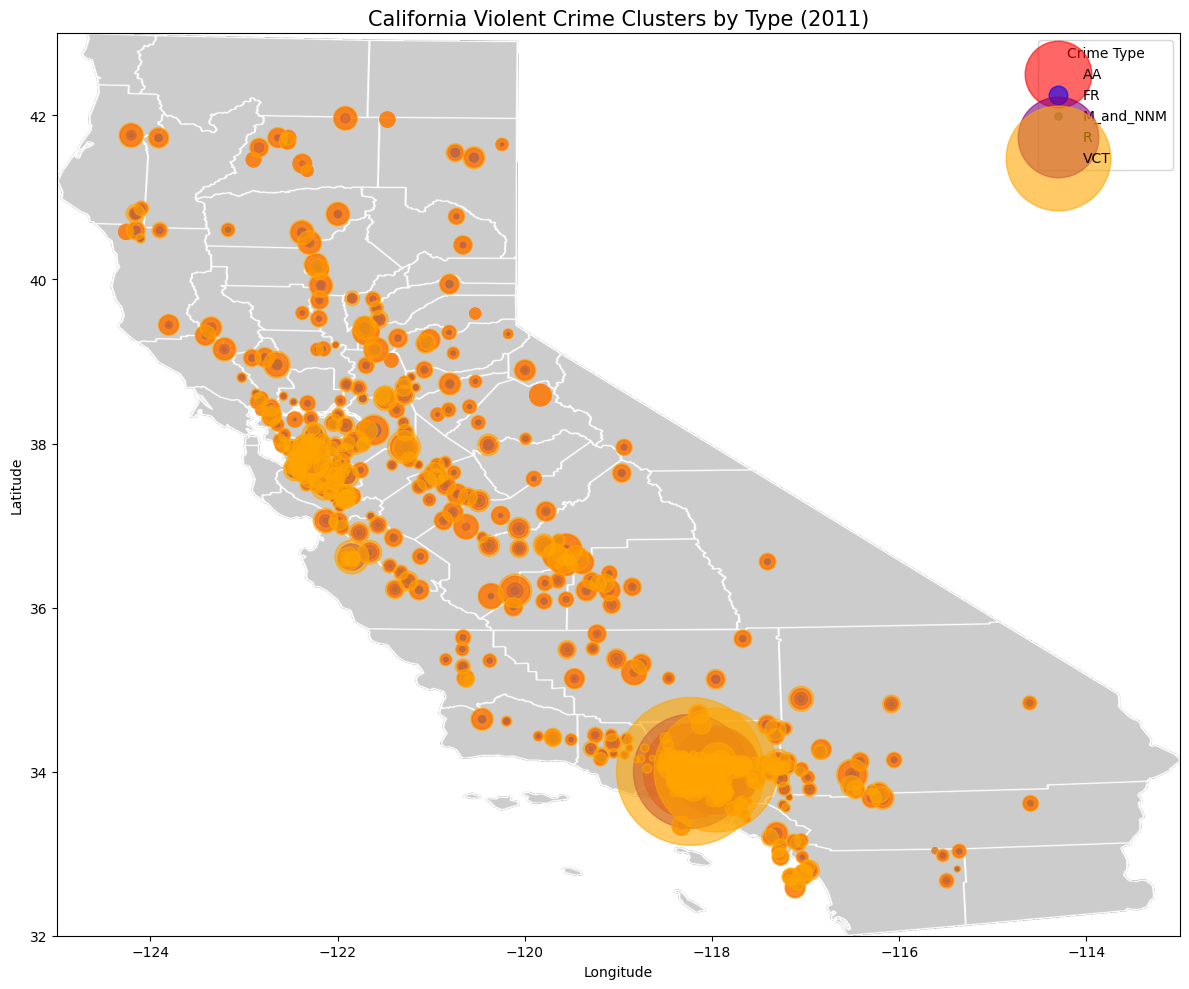

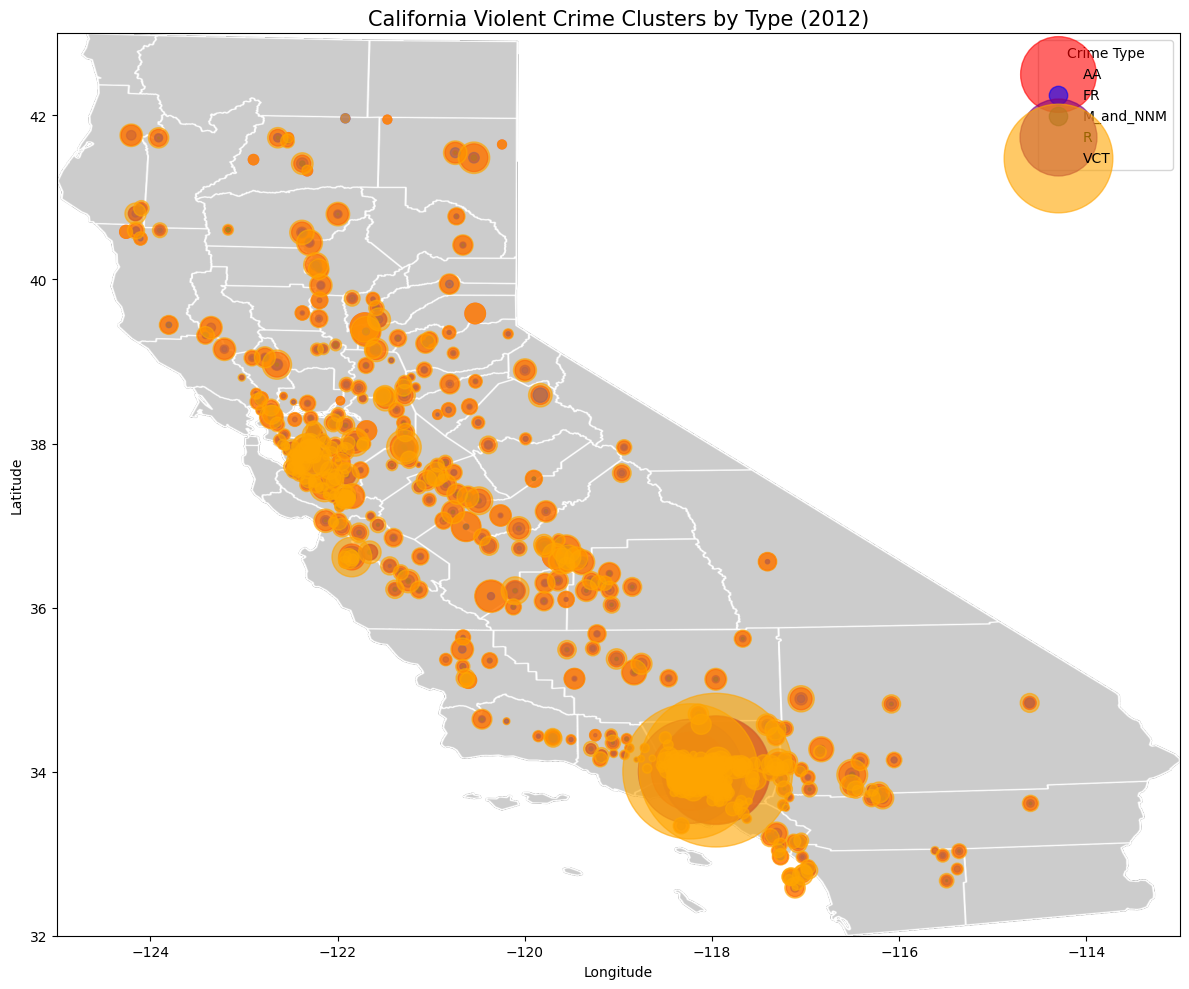

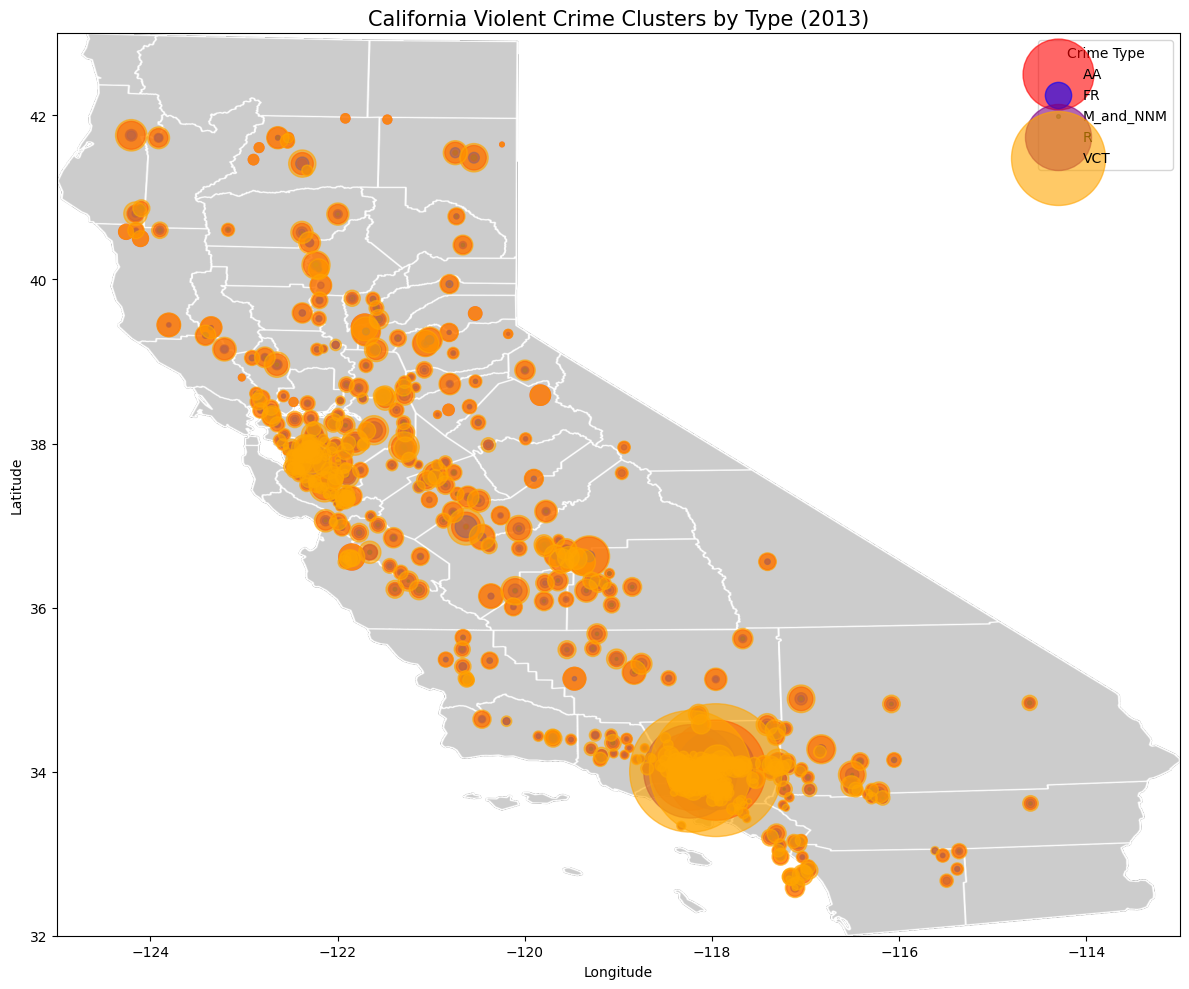

In [17]:
for year in range(2000, 2014):
    plot_crime_clusters(year)